# Clustering of Breast Cancer Features

## <U>Business Understanding
[10 points] Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?


"This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives. A decision model, especially one built using the Decision Model and Notation standard can be used."
1. What are the objectives?
2. What are the requirements?

### Define the Problem from 1 & 2
 * This is the problem...
    
### Preliminary Investigation Plan
 1. Step 1
 2. Step 2
 3. Step 3

## <U>Data Understanding
"The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information."

• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file. Verify data quality: Are there missing values? Duplicate data?
Outliers? Are those mistakes? How do you deal with these problems?

• [10 points] Visualize the any important attributes appropriately. Important: Provide an
interpretation for any charts or graphs.

## Initial collection 
* List sources:
 1. Source1
 
## Get visual
Are there any quality concerns?
* Missing data

Data Insights
* Highly correlated fields
* Highly Skewed data
* Interesting Subsets


In [31]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pandas_profiling is a handy tool for inspecting data
# https://github.com/JosPolfliet/pandas-profiling
# pip install pandas-profiling
import pandas_profiling

C:\Users\ryan.shuhart\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [33]:
# load data
features = pd.read_csv(".\\data\\Features.zip", sep="\t", header=None, compression ="zip")
del features[117] #extra

info = pd.read_csv(".\\data\\Info.zip", sep="\t", header=None, compression ="zip")
del info[11] #extra

#check row lengths the same
print("Are the row lengths the same? ", (features.shape[0] == info.shape[0]))
if (features.shape[0] == info.shape[0]) == True:
    info_features = pd.concat([info,features], axis=1)

Are the row lengths the same?  True


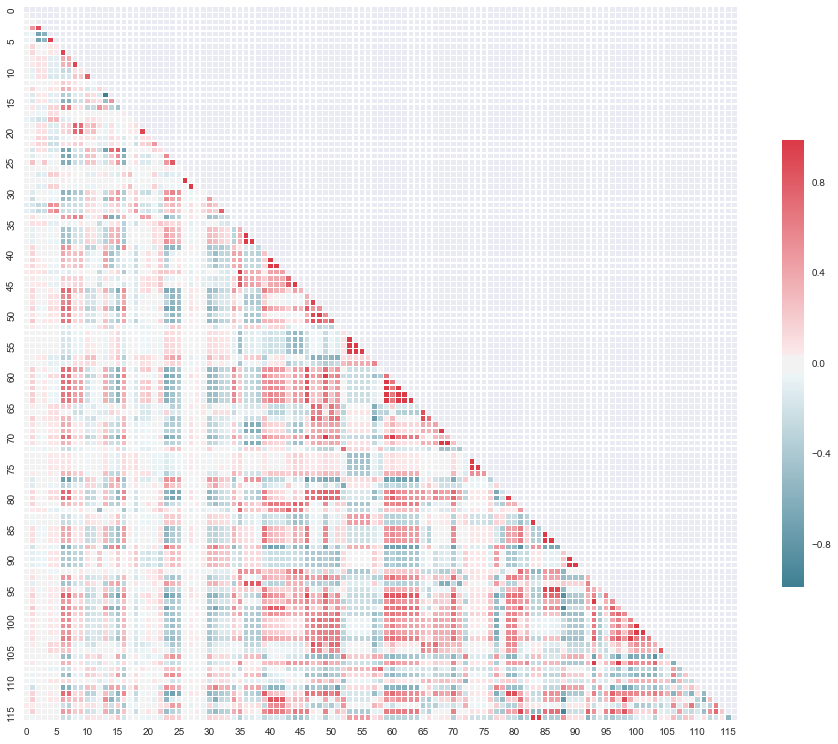

In [30]:
%matplotlib inline
# Compute the correlation matrix
corr = features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## <u>Data Preparation
"The data preparation phase covers all activities to construct the final dataset (data that will be fed into the modeling tool(s)) from the initial raw data. Data preparation tasks are likely to be performed multiple times, and not in any prescribed order. Tasks include table, record, and attribute selection as well as transformation and cleaning of data for modeling tools."


## <u>Modeling
"In this phase, various modeling techniques are selected and applied, and their parameters are calibrated to optimal values. Typically, there are several techniques for the same data mining problem type. Some techniques have specific requirements on the form of data. Therefore, stepping back to the data preparation phase is often needed."

Different tasks will require different evaluation methods. Be as thorough as possible when analyzing
the data you have chosen and use visualizations of the results to explain the performance and
expected outcomes whenever possible. Guide the reader through your analysis with plenty of
discussion of the results. Each option is broken down by:

* [10 Points] Train and adjust parameters
* [10 Points] Evaluate and Compare
* [10 Points] Visualize Results
* [20 Points] Summarize the Ramifications

Option A: Cluster Analysis
* Train: Perform cluster analysis using several clustering methods (adjust parameters).
* Eval: Use internal and/or external validation measures to describe and compare the
clusterings and the clusters— how did you determine a suitable number of clusters for
each method?
* Visualize: Use tables/visualization to discuss the found results. Explain each
visualization in detail.
* Summarize: Describe your results. What findings are the most interesting and why?

## <u>Evaluation
"At this stage in the project you have built a model (or models) that appears to have high quality, from a data analysis perspective. Before proceeding to final deployment of the model, it is important to more thoroughly evaluate the model, and review the steps executed to construct the model, to be certain it properly achieves the business objectives. A key objective is to determine if there is some important business issue that has not been sufficiently considered. At the end of this phase, a decision on the use of the data mining results should be reached."

## <u>Deployment
"Creation of the model is generally not the end of the project. Even if the purpose of the model is to increase knowledge of the data, the knowledge gained will need to be organized and presented in a way that is useful to the customer. Depending on the requirements, the deployment phase can be as simple as generating a report or as complex as implementing a repeatable data scoring (e.g. segment allocation) or data mining process. In many cases it will be the customer, not the data analyst, who will carry out the deployment steps. Even if the analyst deploys the model it is important for the customer to understand up front the actions which will need to be carried out in order to actually make use of the created models."

Be critical of your performance and tell the reader how you current model might be usable by
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?
* How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?
* How would your deploy your model for interested parties?
* What other data should be collected?